In [1]:
import pandas as pd
import os

In [2]:
import random
import matplotlib.pyplot as plt
import collections
import numpy as np
import operator
import simpleclock

In [3]:
data_path = os.path.join(os.path.abspath(''), "data_cine.csv")
cleaned_data_path = os.path.join(os.path.abspath(''), "data_cine_cleaned.csv")

In [4]:
df_all = pd.read_csv(data_path)

In [5]:
print(df_all.shape)
print(df_all.columns.values)

(79958, 4)
['id' 'titre' 'note' 'critique']


## preprocessing

In [6]:
# remove 'empty' reviews (those sending to another website) // to be removed from the DS
def is_review_empty(s): 
    _s = s.lower().replace("  ", " ")
    return len(_s.split()) < 16 and any(sub in _s for sub in 
                                        ("voir la critique", 
                                         "voir le site", 
                                         "voir sur le site", 
                                         "voir le magazine",
                                         "voir le point",
                                         "express.fr",
                                         "point.fr",
                                         "studio ciné live",
                                         "www.",
                                        ))


df_ = df_all.loc[~df_all["critique"].apply(is_review_empty)]
df_removed = df_all.loc[df_all["critique"].apply(is_review_empty)]
empty_reviews = collections.Counter(df_removed["critique"].values)
print(f"{df_removed.shape[0]} ({df_removed.shape[0] / df_all.shape[0]:.2f}%) lines removed")

df_.loc[:, "critique"] = df_["critique"].str.strip()

df_clean = df_

# empty_reviews  # to check

6372 (0.08%) lines removed


/home/cuicui/sources/nn-training/venv/lib/python3.6/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
collections.Counter(map(len, map(str.split, map(str.lower, empty_reviews))))
# sorted(set(map(str.lower, empty_reviews)), key=lambda s: len(s.split()), reverse=True)

Counter({6: 37,
         5: 52,
         4: 30,
         10: 9,
         8: 23,
         12: 3,
         7: 22,
         1: 5,
         9: 14,
         3: 7,
         2: 12})

In [8]:
df = df_clean

In [9]:
df.to_csv(cleaned_data_path, index=False)

## exploration

In [10]:
f"{df.shape[0]} critiques pour {len(set(df.id))} films ({df.shape[0] / len(set(df.id)):.1f} en moy.)"

'73586 critiques pour 4597 films (16.0 en moy.)'

In [11]:
for idx, row in df.iloc[random.sample(range(df.shape[0]), 5), :].iterrows():  # or: ... in df.sample(5).iterrows()
    print(row.titre, ":", row.note)
    print(row.critique)
    print()

L'Ennemi intime : 3.0
Siri abuse des effets voyants pour illustrer un scénario lui-même démonstratif. Sans contester l'utilité d'un tel film, on reste donc sur sa faim.

Babysitting : 2.0
Non seulement cette idée de found footage, reprise de l'américain "Projet X", paraît réchauffée, mais aussi elle pâtit d'un dispositif maladroit. Sans parler des velléités à donner dans le trash, contrariées par une tendance aux bons sentiments qui dégoulinent dans le finale familial.

The Reader : 3.0
S'il n'y a pas grand-chose à redire du point de vue artistique, le fond, en revanche, est plus problématique. Daldry privilégie le drame personnel d'Hanna (...) à la tragédie vécue par les prisonnières qu'elle gardait.

The Duke Of Burgundy : 3.0
Sous la surface SM, Strickland narre une autre histoire, celle d'un amour poussé à l'extrême pour être sûr qu'il existe encore.

Les Trois prochains jours : 4.0
En dépit de quelques incohérences et retournements de situation invraisemblables, il parvient à teni

Text(0.5, 1.0, 'nb of words per review')

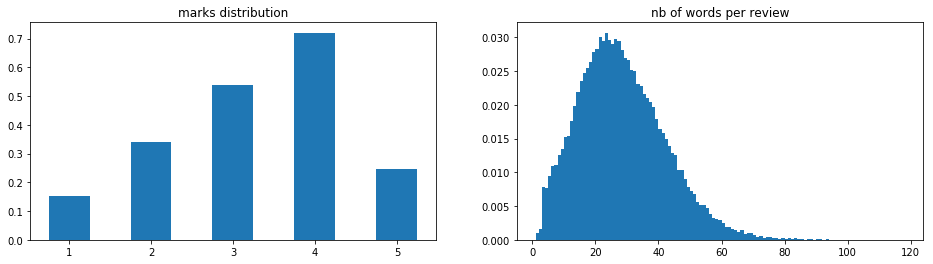

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].hist(df.note.values, density=True, bins=list(np.arange(1, 6, .5)), align="left")
axs[0].set_title("marks distribution")

lens = df.critique.apply(lambda s: len(s.split()))
axs[1].hist(lens, density=True, bins=range(min(lens), max(lens) + 1))
axs[1].set_title("nb of words per review")

In [13]:
for t in df.loc[df.critique.str.contains("(...)", regex=False)].sample(5).itertuples():
    print(t.note)
    print(t.critique)
    print()

4.0
L'histoire devient très vite un prétexte, mais pour une fois, ce n'est pas si grave, tant l'entreprise semble avoir été montée de toute pièce pour nous donner un spectacle total (...) ROCK'N'ROLLA est un bon trip, sans doute exténuant mais purement cinématographique.

4.0
Drôle, irrévérencieux, cruel (...)

4.0
(...) notre rocker national réussit le triple exploit de livrer son meilleur film, de passer à la postérité de son vivant et surtout, de permettre au cinéma hexagonal de faire un grand bond en avant en matière de fantaisie et d'imagination.

5.0
(...) "L'odyssée de Pi" surprend par son souffle épique qui le place très vite bien au-dessus de l'attendu film de Noël.

3.0
Pas d'effort donc, plutôt un univers balisé comme un flipper, avec excitation permanente, réversibilité de tous les instants et surtout, un cadre bien carré qui ne laisse strictement rien passer. (...) A la fois bourrée de fric et avare en prise de risque, cette coquille vide ne se départie jamais d'une certai